<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/Ivanov%20Alexander/cabbageYolo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #Подключаем гугл диск

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = '/content/gdrive/MyDrive/cabbage/data' # Указываем папку где лежит датасет

In [ ]:
!pip install ultralytics



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.4/617.4 kB 7.5 MB/s eta 0:00:00


In [ ]:
import os

from ultralytics import YOLO


# Загружаем модель YOLO8n
model = YOLO("yolov8n.yaml")  # Создаем новую модель

# Используйте модель
results = model.train(data=os.path.join(ROOT_DIR, "cabbage_config.yaml"), epochs=300)  # Обучаем модель



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

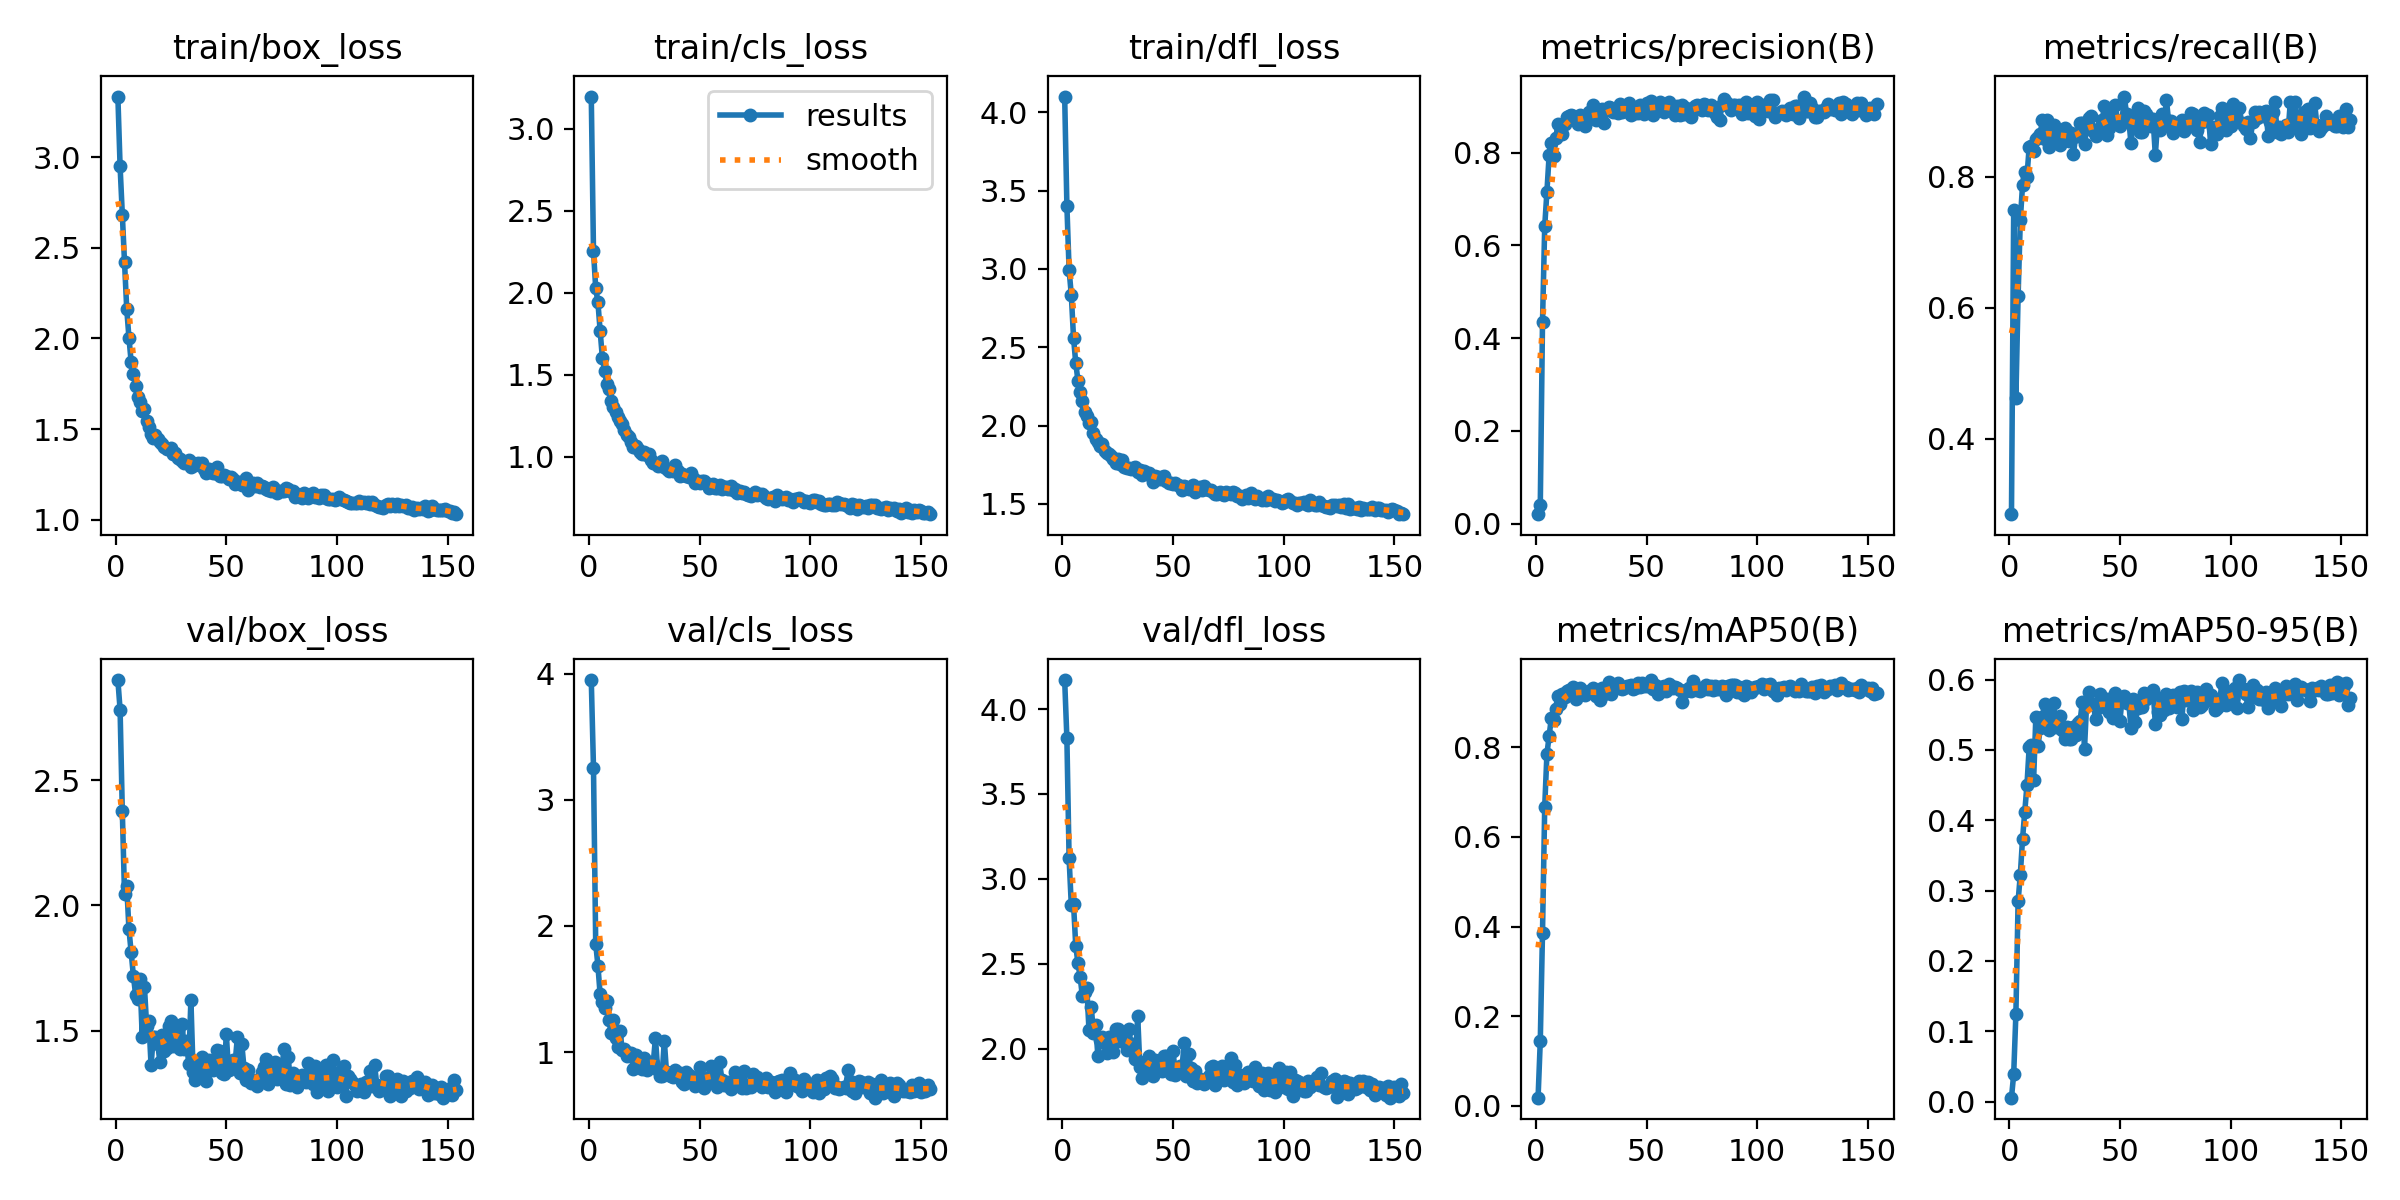

In [ ]:
# Посмотреть итог обучения
from IPython.display import Image
Image(filename='/content/runs/detect/train/results.png', height=600)

In [ ]:
# Сохранение обученной модели

import shutil

# Путь к исходному файлу
source_folder = '/content/runs/detect/train/'

# Путь к целевой папке на Google Диске
destination_folder = '/content/gdrive/MyDrive/cabbage/runs/detect/train111'

# Копирование файла на Google Диск
#shutil.copytree(source_folder, destination_folder)

# Команда для копирования папки
shutil.copytree(source_folder, destination_folder)

'/content/gdrive/MyDrive/cabbage/runs/detect/train111'

In [ ]:
# Восстановление последней модели
# Нужно подставить путь к своим сохраненным весам

model_path = '/content/gdrive/MyDrive/cabbage/runs/detect/train111/weights/best.pt'
model = YOLO(model_path)

In [ ]:
# Все что определилось с вероятностью conf=0.5 приняли решение что будем показывать

model.val(conf=0.5)
model.val(data=os.path.join(ROOT_DIR, "cabbage_config.yaml"), conf=0.5)

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/gdrive/MyDrive/cabbage/data/labels/val.cache... 73 images, 1 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.97s/it]
                   all         73       1130      0.952      0.709      0.827       0.56
Speed: 2.4ms preprocess, 20.9ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/val
Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/gdrive/MyDrive/cabbage/data/labels/val.cache... 73 images, 1 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████|

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c39083565f0>
fitness: 0.587054700091253
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.56042])
names: {0: 'bad'}
plot: True
results_dict: {'metrics/precision(B)': 0.9524375743162902, 'metrics/recall(B)': 0.7088495575221239, 'metrics/mAP50(B)': 0.8267452360356615, 'metrics/mAP50-95(B)': 0.560422418319652, 'fitness': 0.587054700091253}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 2.4378593653848726, 'inference': 5.353245016646712, 'loss': 0.0011888268875749144, 'postprocess': 4.822117008575022}

In [ ]:
import cv2

In [ ]:
# Предикт на картинке

results = model.predict(source="/content/gdrive/MyDrive/cabbage/test/frame2_0077.jpg_transformed_4.jpg", conf=0.40, save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/gdrive/MyDrive/cabbage/test/frame2_0077.jpg_transformed_4.jpg: 384x640 8 bads, 79.2ms
Speed: 3.5ms preprocess, 79.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


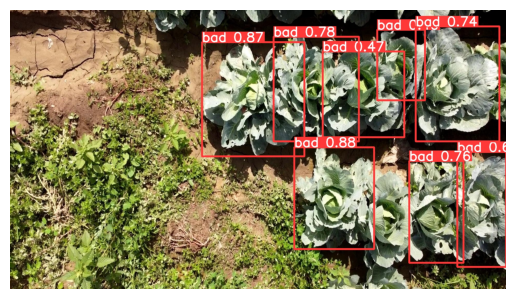

In [ ]:
import matplotlib.pyplot as plt

# Берем то что выше вывелось и подставляем сюда:
image = cv2.imread('/content/runs/detect/predict/frame2_0077.jpg_transformed_4.jpg')

# отображение изображения
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()